In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

In [150]:
df=pd.read_csv('trainms.csv')
df.head()

,s.no,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,1,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,3,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,4,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,5,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [151]:
df.isnull().sum()

s.no                           0
Timestamp                      0
Age                            0
Gender                         0
Country                        0
state                        400
self_employed                 18
family_history                 0
treatment                      0
work_interfere               226
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
comments                     873
dtype: int64

In [152]:
print(df.shape[0])

1000


In [153]:
df=df.drop(['Country','Gender','state','work_interfere','comments','Timestamp'],axis=1)
df.head()

,s.no,Age,self_employed,family_history,treatment,no_employees,remote_work,tech_company,benefits,care_options,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,1,37,NaN,No,Yes,6-25,No,Yes,Yes,Not sure,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,2,44,NaN,No,No,More than 1000,No,No,Don't know,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,3,32,NaN,No,No,6-25,No,Yes,No,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,4,31,NaN,Yes,Yes,26-100,No,Yes,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,5,31,NaN,No,No,100-500,Yes,Yes,Yes,No,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [154]:
df=df.replace(to_replace =['no','No','N','NO'],value =0)
df=df.replace(to_replace =['yes','Yes','Y','YES'],value =1)

In [155]:
df.head()

,s.no,Age,self_employed,family_history,treatment,no_employees,remote_work,tech_company,benefits,care_options,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,1,37,NaN,0,1,6-25,0,1,1,Not sure,...,1,Somewhat easy,0,0,Some of them,1,0,Maybe,1,0
1,2,44,NaN,0,0,More than 1000,0,0,Don't know,0,...,Don't know,Don't know,Maybe,0,0,0,0,0,Don't know,0
2,3,32,NaN,0,0,6-25,0,1,0,0,...,Don't know,Somewhat difficult,0,0,1,1,1,1,0,0
3,4,31,NaN,1,1,26-100,0,1,0,1,...,0,Somewhat difficult,1,1,Some of them,0,Maybe,Maybe,0,1
4,5,31,NaN,0,0,100-500,1,1,1,0,...,Don't know,Don't know,0,0,Some of them,1,1,1,Don't know,0


In [156]:
df.self_employed.unique()

array([nan,  1.,  0.])

In [146]:
df=pd.get_dummies(df,columns=["self_employed","family_history","remote_work","tech_company","benefits","care_options","wellness_program"])


In [132]:
df=df.drop(["benefits_0","benefits_Don't know",'care_options_0','care_options_Not sure','wellness_program_0',"wellness_program_Don't know"],axis=1)
df

,s.no,Age,treatment,no_employees,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,...,self_employed_1.0,family_history_0,family_history_1,remote_work_0,remote_work_1,tech_company_0,tech_company_1,benefits_1,care_options_1,wellness_program_1
0,1,37,1,6-25,1,1,Somewhat easy,0,0,Some of them,...,0,1,0,1,0,0,1,1,0,0
1,2,44,0,More than 1000,Don't know,Don't know,Don't know,Maybe,0,0,...,0,1,0,1,0,1,0,0,0,0
2,3,32,0,6-25,0,Don't know,Somewhat difficult,0,0,1,...,0,1,0,1,0,0,1,0,0,0
3,4,31,1,26-100,0,0,Somewhat difficult,1,1,Some of them,...,0,0,1,1,0,0,1,0,1,0
4,5,31,0,100-500,Don't know,Don't know,Don't know,0,0,Some of them,...,0,1,0,0,1,0,1,1,0,0
5,6,33,0,6-25,Don't know,Don't know,Don't know,0,0,1,...,0,0,1,1,0,0,1,1,0,0
6,7,35,1,1-5,0,0,Somewhat difficult,Maybe,Maybe,Some of them,...,0,0,1,0,1,0,1,0,0,0
7,8,39,0,1-5,0,1,Don't know,0,0,0,...,0,1,0,0,1,0,1,0,1,0
8,9,42,1,100-500,0,0,Very difficult,Maybe,0,1,...,0,0,1,1,0,0,1,1,1,0
9,10,23,0,26-100,Don't know,Don't know,Don't know,0,0,1,...,0,1,0,1,0,0,1,0,0,0


In [115]:
df=df.drop(["family_history_0","remote_work_0","tech_company_0","self_employed_0.0"],axis=1)


KeyError: "['self_employed_0.0'] not found in axis"

In [77]:
df.head()
df.isnull().sum()

s.no                         0
Age                          0
no_employees                 0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
self_employed_0              0
self_employed_1              0
family_history_0             0
family_history_1             0
remote_work_0                0
remote_work_1                0
tech_company_0               0
tech_company_1               0
benefits_1                   0
care_options_1               0
wellness_program_1           0
dtype: int64

In [78]:
df.dropna()

,s.no,Age,no_employees,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,...,self_employed_1,family_history_0,family_history_1,remote_work_0,remote_work_1,tech_company_0,tech_company_1,benefits_1,care_options_1,wellness_program_1
0,1,25,6-25,Don't know,1,Somewhat easy,0,0,1,1,...,0,0,1,0,1,0,1,1,1,0
1,2,42,6-25,Don't know,Don't know,Don't know,Maybe,0,Some of them,1,...,0,0,1,0,1,0,1,0,0,0
2,3,34,100-500,0,1,Very easy,0,0,1,1,...,0,0,1,1,0,0,1,1,1,0
3,4,26,26-100,Don't know,Don't know,Don't know,Maybe,0,Some of them,0,...,0,1,0,0,1,0,1,0,0,0
4,5,35,1-5,0,1,Very easy,1,1,Some of them,Some of them,...,0,0,1,1,0,0,1,0,1,0
5,6,34,500-1000,Don't know,Don't know,Very easy,Maybe,0,1,1,...,0,1,0,1,0,0,1,0,0,0
6,7,38,100-500,1,1,Very easy,0,0,1,1,...,0,0,1,0,1,1,0,1,1,0
7,8,34,100-500,0,Don't know,Don't know,1,0,Some of them,0,...,0,1,0,1,0,0,1,0,0,0
8,9,39,6-25,0,1,Somewhat easy,0,0,Some of them,1,...,0,0,1,0,1,0,1,0,1,0
9,10,44,100-500,0,Don't know,Don't know,1,0,0,0,...,0,1,0,1,0,0,1,0,0,0


In [79]:
df.describe

<bound method NDFrame.describe of      s.no  Age    no_employees   seek_help   anonymity               leave  \
0       1   25            6-25  Don't know           1       Somewhat easy   
1       2   42            6-25  Don't know  Don't know          Don't know   
2       3   34         100-500           0           1           Very easy   
3       4   26          26-100  Don't know  Don't know          Don't know   
4       5   35             1-5           0           1           Very easy   
5       6   34        500-1000  Don't know  Don't know           Very easy   
6       7   38         100-500           1           1           Very easy   
7       8   34         100-500           0  Don't know          Don't know   
8       9   39            6-25           0           1       Somewhat easy   
9      10   44         100-500           0  Don't know          Don't know   
10     11   40  More than 1000           1           1          Don't know   
11     12   33             1-5

In [80]:
df=df.drop(['no_employees'],axis=1)

In [81]:
df=df.replace(to_replace =["Don't know"],
                 value =0)
df=df.replace(to_replace =["Very easy"],
                 value =1)
df=df.replace(to_replace =["Somewhat easy"],
                 value =2)
df=df.replace(to_replace =["Somewhat difficult"],
                 value =3)
df=df.replace(to_replace =["Very difficult"],
                 value =4)
df=df.replace(to_replace =["Don't know","Not sure","Maybe",'Some of them'],
                 value =0.5)



df.head()

,s.no,Age,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,...,self_employed_1,family_history_0,family_history_1,remote_work_0,remote_work_1,tech_company_0,tech_company_1,benefits_1,care_options_1,wellness_program_1
0,1,25,0,1,2,0.0,0.0,1.0,1.0,0.5,...,0,0,1,0,1,0,1,1,1,0
1,2,42,0,0,0,0.5,0.0,0.5,1.0,0.0,...,0,0,1,0,1,0,1,0,0,0
2,3,34,0,1,1,0.0,0.0,1.0,1.0,0.5,...,0,0,1,1,0,0,1,1,1,0
3,4,26,0,0,0,0.5,0.0,0.5,0.0,0.5,...,0,1,0,0,1,0,1,0,0,0
4,5,35,0,1,1,1.0,1.0,0.5,0.5,0.0,...,0,0,1,1,0,0,1,0,1,0


In [49]:
df.describe

<bound method NDFrame.describe of      s.no  Age  treatment  seek_help  anonymity  leave  \
0       1   37          1          1          1      2   
1       2   44          0          0          0      0   
2       3   32          0          0          0      3   
3       4   31          1          0          0      3   
4       5   31          0          0          0      0   
5       6   33          0          0          0      0   
6       7   35          1          0          0      3   
7       8   39          0          0          1      0   
8       9   42          1          0          0      4   
9      10   23          0          0          0      0   
10     11   31          1          0          0      0   
11     12   29          0          0          0      0   
12     13   42          1          0          0      3   
13     14   36          0          0          0      0   
14     15   27          0          0          0      2   
15     16   29          1          0  

In [50]:

df=df.rename(columns={'mental_health_consequence': "mhc", "phys_health_consequence": "phc","phys_health_interview": "phi"})

df

,s.no,Age,treatment,seek_help,anonymity,leave,mhc,phc,coworkers,supervisor,...,phi,mental_vs_physical,obs_consequence,self_employed_1.0,family_history_1,remote_work_1,tech_company_1,benefits_1,care_options_1,wellness_program_1
0,1,37,1,1,1,2,0.0,0.0,0.5,1.0,...,0.5,1,0,0,0,0,1,1,0,0
1,2,44,0,0,0,0,0.5,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,3,32,0,0,0,3,0.0,0.0,1.0,1.0,...,1.0,0,0,0,0,0,1,0,0,0
3,4,31,1,0,0,3,1.0,1.0,0.5,0.0,...,0.5,0,1,0,1,0,1,0,1,0
4,5,31,0,0,0,0,0.0,0.0,0.5,1.0,...,1.0,0,0,0,0,1,1,1,0,0
5,6,33,0,0,0,0,0.0,0.0,1.0,1.0,...,0.5,0,0,0,1,0,1,1,0,0
6,7,35,1,0,0,3,0.5,0.5,0.5,0.0,...,0.0,0,0,0,1,1,1,0,0,0
7,8,39,0,0,1,0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,1,1,0,1,0
8,9,42,1,0,0,4,0.5,0.0,1.0,1.0,...,0.5,0,0,0,1,0,1,1,1,0
9,10,23,0,0,0,0,0.0,0.0,1.0,1.0,...,0.5,1,0,0,0,0,1,0,0,0


In [51]:
df.describe()
df['Age']=np.where(df['Age']<=0, df["Age"].median(skipna=True), df['Age'])


In [52]:
df.describe


<bound method NDFrame.describe of      s.no   Age  treatment  seek_help  anonymity  leave  mhc  phc  coworkers  \
0       1  37.0          1          1          1      2  0.0  0.0        0.5   
1       2  44.0          0          0          0      0  0.5  0.0        0.0   
2       3  32.0          0          0          0      3  0.0  0.0        1.0   
3       4  31.0          1          0          0      3  1.0  1.0        0.5   
4       5  31.0          0          0          0      0  0.0  0.0        0.5   
5       6  33.0          0          0          0      0  0.0  0.0        1.0   
6       7  35.0          1          0          0      3  0.5  0.5        0.5   
7       8  39.0          0          0          1      0  0.0  0.0        0.0   
8       9  42.0          1          0          0      4  0.5  0.0        1.0   
9      10  23.0          0          0          0      0  0.0  0.0        1.0   
10     11  31.0          1          0          0      0  0.0  0.0        0.5   
11    

In [53]:
from sklearn.model_selection import train_test_split
labels=df['treatment']
df_train=df.drop(['treatment'],axis=1)
x_train,x_test,y_train,y_test=train_test_split(df_train,labels,test_size=0.2)


KeyError: "['treatment'] not found in axis"

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [ ]:
model.fit(x_train,y_train)
prediction=model.predict(x_test)

model.fit(x_train,y_train)
prediction=model.predict(x_test)

In [ ]:
model.score(x_test,y_test)

In [ ]:
x_train.head()


In [ ]:
print("Training data length:",x_train.shape[0])
print("Testing data length:",x_test.shape[0])

In [ ]:
df.head()


In [ ]:
from sklearn.model_selection import train_test_split
labels=training['treatment']
train_data=training.drop(['treatment'],axis=1)
x_train,x_test,y_train,y_test=train_test_split(train_data,labels,test_size=0.2)

### Finally the moment you've been waiting for ....
Now let's get on to building a simple linear regression model.
All we'll try to do is fit a straight line through our data and then predict new values

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model=LinearRegression()
model.fit(x_train,y_train)

### Now we check how good our model actually is
We do this by using the testing data that we had initially set aside. We predict the expected time of the taxi ride for those data values and then compare against what the actual duration of the ride was

In [ ]:
predictions=model.predict(x_test)
error=mean_squared_error(y_test,predictions)
print("Mean Squared Error (MSE) of the model is :",error)
print("Root Mean Squared Error (RMSE) of the model is :",math.sqrt(error))

### Time for some feature engineering

Feature engineering is the task of gaining more insights from your data and creating features that would help your model perform better. 

In this dataset let's add the difference of longitudes and latitudes so that we get a relative distance measure. We can also add in attributes for the time of day, which day of the week as well as which day of the year the taxi ride occurs

In [ ]:
df=pd.read_csv('train_2.csv')
df=df.dropna(axis=0)

### Using the timestamp information
We will infer a variety of new data from the given timestamps, such as the which day of the week it is ( We all know the horrible monday morning traffic), the hour of the day and which day of the year 

In [ ]:
df.pickup_datetime=pd.to_datetime(df.pickup_datetime)
df.dropoff_datetime=pd.to_datetime(df.dropoff_datetime)
df['hour'] = df.pickup_datetime.dt.hour
df['year'] = df.pickup_datetime.dt.year
df.head()

### Adding geospatial information

Sounds pretty fancy right? well it's just information about the difference between the longitudes and latitudes of the pickup and dropoff location

In [ ]:
def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295 # Pi/180
    a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))

In [ ]:
df['distance_miles'] = distance(df.pickup_latitude, df.pickup_longitude, \
                                     df.dropoff_latitude, df.dropoff_longitude)
df.head()

### Some quick cleanup
We remove all the old features that we had used to generate new ones, they are redundant now

In [ ]:
df=df[['passenger_count','trip_duration','hour','year','distance_miles']]

In [ ]:
labels=df['trip_duration']
df_train=df.drop(['trip_duration'],axis=1)

### Back to the magic of machine learning

We use the same code as above for training and testing our new and hopefully imrpoved model

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df_train,labels,test_size=0.2)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model=LinearRegression()
model.fit(x_train,y_train)

In [ ]:
predictions=model.predict(x_test)
error=mean_squared_error(y_test,predictions)
print("Mean Squared Error (MSE) of the model is :",error)
print("Root Mean Squared Error (RMSE) of the model is :",math.sqrt(error))

In [ ]:
model.score(x_test,y_test)

### That sure is an improvement! 
See our magical feature engineering worked! We have improved our model by just applying simple intuition

### Now we're going to try see how data transforms work
For this I am going to plot the distribution of the different attributes in the dataset

In [ ]:
f = pd.melt(df)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

As we can clearly observe that the data is mostly skewed, this could be because an attribute has most of it's values in a small range. Or it could be beacuse of outliers. We will use log transforms to get reduce the skewness

In [ ]:
def log_transform(feature):
    df[feature] = np.log1p(df[feature].values)

In [ ]:
log_transform('trip_duration')
log_transform('passenger_count')
log_transform('distance_miles')

In [ ]:
f = pd.melt(df)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

In [ ]:
labels=df['trip_duration']
df_train=df.drop(['trip_duration'],axis=1)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(df_train,labels,test_size=0.2)

In [ ]:
model=LinearRegression()
model.fit(x_train,y_train)

In [ ]:
predictions=model.predict(x_test)
error=mean_squared_error(y_test,predictions)
print("Mean Squared Error (MSE) of the model is :",error)
print("Root Mean Squared Error (RMSE) of the model is :",math.sqrt(error))

In [ ]:
model.score(x_test,y_test)

### So that was a huge leap.....
As we saw using log transforms helped us get a huge boost in how well the model fits. This is mainly because the data is now moved towards normality and the outlier influence on the model is greatly reduced

### Let's try a few more advanced forms of regression

Starting with a decision tree regression model. A decision tree is just a simple structure with each of the nodes of the tree an attribute, and the leaves are the target variable. 

In [ ]:
from sklearn.tree import DecisionTreeRegressor  
regressor = DecisionTreeRegressor(max_depth=2,min_samples_leaf=5, min_samples_split= 5,max_leaf_nodes=10)  
regressor.fit(x_train, y_train) 

In [ ]:
predictions=regressor.predict(x_test)
error=mean_squared_error(y_test,predictions)
print("Mean Squared Error (MSE) of the model is :",error)
print("Root Mean Squared Error (RMSE) of the model is :",math.sqrt(error))

In [ ]:
regressor.score(x_test,y_test)

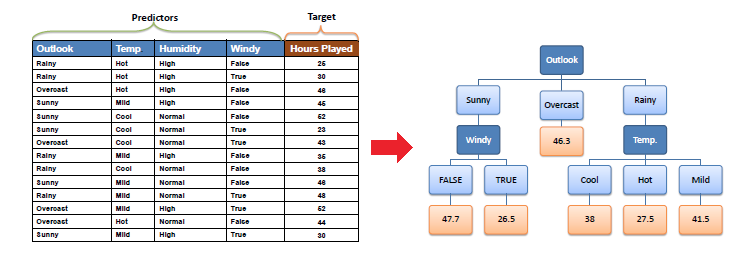

### Let's try some regularization now

Regularization helps us avoid overfitting, so it helps us generalize better and therefore improve the quality of the model.

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

model=Ridge()
model.fit(x_train,y_train)

In [ ]:
predictions=model.predict(x_test)
error=mean_squared_error(y_test,predictions)
print("Mean Squared Error (MSE) of the model is :",error)
print("Root Mean Squared Error (RMSE) of the model is :",math.sqrt(error))

In [ ]:
model.score(x_test,y_test)